In [3]:
import tensorflow as tf
import numpy as np
import os
import cv2

In [7]:
import matplotlib.pyplot as plt

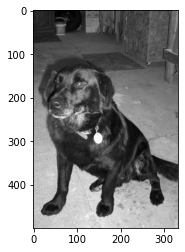

In [8]:
data_directory = "/Users/veronika/Downloads/kagglecatsanddogs_3367a/PetImages"
categories = ['Dog', 'Cat']

for category in categories:
    path = os.path.join(data_directory, category) # path to cats or dog dir
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break

In [9]:
print(img_array)

[[ 41  42  43 ... 123 138 135]
 [ 39  40  41 ... 133 143 136]
 [ 40  41  41 ... 139 145 135]
 ...
 [207 194 213 ... 207 198 188]
 [203 190 212 ... 202 191 184]
 [172 168 204 ... 195 182 179]]


In [10]:
print(img_array.shape)

(500, 333)


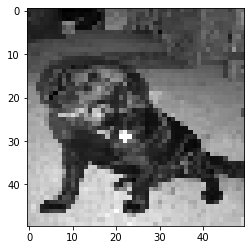

In [11]:
img_size = 50

new_array = cv2.resize(img_array, (img_size, img_size))
plt.imshow(new_array, cmap='gray')
plt.show()

In [13]:
training_data = []

def create_training_data():
    for category in categories:
        path = os.path.join(data_directory, category) # path to cats or dog dir
        class_num = categories.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (img_size, img_size))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass

create_training_data()

In [14]:
print(len(training_data))

24946


In [15]:
import random

random.shuffle(training_data)

In [18]:
for sample in training_data[:10]:
    print(sample[1])

1
0
1
1
0
1
0
1
1
1


In [22]:
train_images = []
train_labels = []

In [23]:
for features, label in training_data:
    train_images.append(features)
    train_labels.append(label)

# -1 -> any feature
# 1 -> grayscale
train_images = np.array(train_images).reshape(-1, img_size, img_size, 1)

In [24]:
import pickle

pickle_out = open("train_images.pickle", "wb")
pickle.dump(train_images, pickle_out)
pickle_out.close()

pickle_out = open("train_labels.pickle", "wb")
pickle.dump(train_labels, pickle_out)
pickle_out.close()

In [25]:
pickle_in = open("train_images.pickle", "rb")

train_images = pickle.load(pickle_in)

In [27]:
train_images[0]

array([[[ 62],
        [187],
        [165],
        ...,
        [ 56],
        [ 57],
        [ 73]],

       [[ 60],
        [140],
        [ 69],
        ...,
        [ 58],
        [ 56],
        [ 70]],

       [[ 52],
        [153],
        [ 68],
        ...,
        [ 88],
        [ 77],
        [ 85]],

       ...,

       [[191],
        [193],
        [195],
        ...,
        [ 42],
        [192],
        [ 91]],

       [[187],
        [189],
        [191],
        ...,
        [ 69],
        [ 71],
        [123]],

       [[183],
        [186],
        [188],
        ...,
        [ 84],
        [ 65],
        [ 79]]], dtype=uint8)

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Conv2D, Flatten, MaxPooling2D

import pickle

train_labels = pickle.load(open("train_labels.pickle", "rb"))

train_images = np.array(train_images / 255.0)
train_labels = np.array(train_labels)

model = Sequential()
# [1:] so that we skip the feature info from 
# np.array(train_images).reshape(-1, img_size, img_size, 1)
model.add(Conv2D(64, (3, 3), input_shape = train_images.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss="binary_crossentropy",
            optimizer="adam",
            metrics=["accuracy"])
        
model.fit(train_images, train_labels, batch_size=32, epochs=3, validation_split=0.1)


Epoch 1/3
702/702 [==============================] - 106s 150ms/step - loss: 0.6934 - accuracy: 0.5037 - val_loss: 0.6935 - val_accuracy: 0.4942
Epoch 2/3
702/702 [==============================] - 106s 150ms/step - loss: 0.6932 - accuracy: 0.5040 - val_loss: 0.6931 - val_accuracy: 0.5058
Epoch 3/3
702/702 [==============================] - 107s 152ms/step - loss: 0.6932 - accuracy: 0.4965 - val_loss: 0.6931 - val_accuracy: 0.5058
